# Global Suicide Rate Analysis

In this notebook, dataset of suicide rate from 1985-2015 globally is investigated. The dataset is used to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

In the dataset, features like **country, year,sex, age, suicides number, population of the country** are listed. Based on the dataset, five questions are proposed:

1. Is there any relation between the global suicide rate and GDP during the time span?
2. What’s the suicide rate difference between males and females?
3. What’s the suicide rate at different ages?
4. Which counties have the highest and lowest suicide rate?
5. Between United States and Mexico, which country has a higher suicide rate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


## 1. Load and pre-process the dataset

In [2]:
df = pd.read_csv('master.csv')
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
2767,Bahrain,2004,male,75+ years,0,2924,0.00,Bahrain2004,NaN,"13,150,166,755",17497,Silent
17482,New Zealand,1987,male,5-14 years,7,269800,2.59,New Zealand1987,NaN,"40,338,594,862",13238,Generation X
24456,Sweden,1994,female,75+ years,70,444500,15.75,Sweden1994,NaN,"226,079,963,712",27658,G.I. Generation
11978,Iceland,2010,male,15-24 years,6,23905,25.10,Iceland2010,0.892,"13,310,567,803",45179,Millenials
8529,Estonia,2009,female,35-54 years,14,189570,7.39,Estonia2009,NaN,"19,652,492,637",15609,Boomers


### Findings from the dataset
From the dataset, we can see data is constructed as suicides numbers of each country at each year, and suicide number is subgrouped by sex and age. The GPD, population, suicides/100k pop, gdp_per_capita ($) are also listed at each group. 
Therefore we can check the suicide rate by country, year, sex and different age. 

### Data preparation

In [3]:
# Check missing values 
df.isnull().sum()
# Only "HID for year" has missing values, drop column  due to insufficient data
df.drop(['HDI for year'], axis=1, inplace=True)

In [4]:
# Check categorical feature: 'year'
df['year'].value_counts()


2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [5]:
# data counts in year 2016 is much less than other years, therefore drop rows from this year
df = df[df.year!=2016]

In [6]:
# Check categorical feature: 'Country'
# drop counties less than 100 datapoints
values = df['country'].value_counts().keys().tolist()
counts = df['country'].value_counts().tolist()

for idx, value in enumerate(counts):
    if value < 100:
        df = df[df.country!=values[idx]]
df['country'].value_counts()

Luxembourg           372
Spain                372
Belgium              372
Israel               372
Singapore            372
Ecuador              372
Colombia             372
United States        372
Malta                372
Chile                372
Brazil               372
Mexico               372
Greece               372
Austria              372
Japan                372
Netherlands          372
United Kingdom       372
Puerto Rico          372
Argentina            372
Mauritius            372
Republic of Korea    372
Italy                372
Iceland              372
Guatemala            360
Norway               360
Australia            360
Ireland              360
Costa Rica           360
France               360
Bulgaria             360
                    ... 
Cuba                 288
Armenia              288
Bahamas              276
Albania              264
Georgia              264
Denmark              264
Uzbekistan           264
Slovakia             264
Bahrain              252


In [7]:
# suicide['year'].value_counts()
# drop year 2016 due to insufficient data
# drop column "country-year" due to duplicate information
# drop column "generation" due to unused information
#df = df[df.year!=2016]
df.drop(['country-year', 'generation'], axis=1, inplace=True)
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
22788,Slovakia,1993,male,15-24 years,52,420445,12.37,"16,452,201,101",3334
26352,Ukraine,2010,female,15-24 years,154,3125122,4.93,"136,013,155,905",3141
4795,Bulgaria,2005,male,5-14 years,3,371764,0.81,"29,636,617,750",4003
21165,Russian Federation,2008,male,25-34 years,6860,11091377,61.85,"1,660,844,408,500",12359
25569,Trinidad and Tobago,2006,female,55-74 years,6,88991,6.74,"18,369,070,085",15190


In [8]:
# convert gdp data to numeric
df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '].str.replace(',',''))


In [9]:
df.rename(columns={' gdp_for_year ($) ':'gdp', 'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)


In [10]:
df['country'].unique().shape

(90,)

## 2. Data Modeling: Process and investigate the dataset

### 2.1 Suicide rate trend globally over year

In [11]:
# group dataset by year and calculate summation 
df_yearly = df.groupby(['year']).sum()
#df_yearly

In [12]:
# calculate average gdp of each year based on all countries
gdp_year = []
country_num = []
for i in range(1985, 2016):
    gdp_year.append(df[df['year'] == i]['gdp'].unique().mean())
    country_num.append(len(df[df['year'] == 2015]['country'].unique()))
#gdp_year

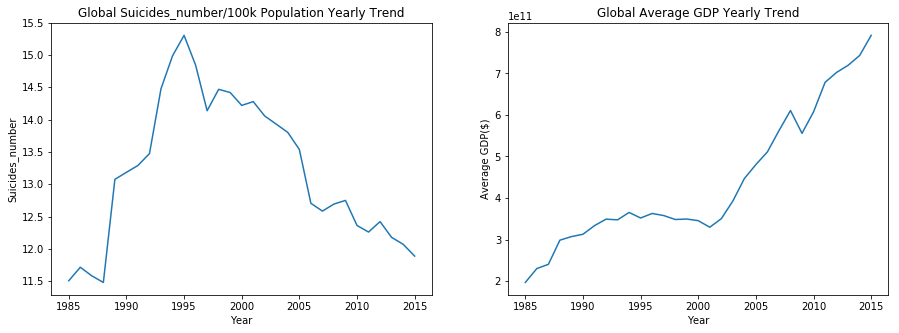

In [13]:
figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

axs[0].plot(df_yearly.index.values, df_yearly['suicides_no']/df_yearly['population']*1e5)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Suicides_number')
axs[0].set_title('Global Suicides_number/100k Population Yearly Trend')

axs[1].plot(df_yearly.index.values, gdp_year)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average GDP($)')
axs[1].set_title('Global Average GDP Yearly Trend')

plt.show()

#plt.plot(df.groupby(['year']).mean()['suicides/100k pop'])

we can see that the suicide rate peaks at 1995, and gradually decreasing in the following years, until 2015, the suicide rate is only close to year 1986. While the average gdp is increasing gradually in the plotted time span, and we see no particular change in the year 1995. 

### 2.2 Suicide rate comparison over gender 

In [14]:
df_gender = df.groupby(['sex']).sum()
df_gender

,year,suicides_no,population,suicides/100k pop,gdp,gdp_per_capita
sex,,,,,,
female,27278850,1552770,25931459488,74339.67,6137264795389872,228817002
male,27278850,5166857,24690335748,278701.38,6137264795389872,228817002


In [15]:
# calculate the suicide rate of male and female over time respectively 
year =  range(1985, 2016)
male_year = []
female_year = []
for i in year:
    male_year.append(df[(df.year==i)&(df.sex=='male')]['suicides/100k pop'].mean())
    female_year.append(df[(df.year==i)&(df.sex=='female')]['suicides/100k pop'].mean())
print(male_year)

[18.255815602836876, 17.033993055555555, 17.556296296296296, 19.095408163265304, 19.581314102564104, 20.133492063492067, 21.180740740740738, 21.071640625000001, 21.636153846153846, 21.997263681592038, 24.905256410256413, 24.296471861471865, 23.903982683982683, 23.774198312236287, 23.348394308943089, 22.266980392156864, 21.546344696969697, 21.966996124031009, 21.107655038759692, 19.909761904761904, 19.504837398373986, 19.296984126984128, 19.264137254901961, 19.044781746031745, 18.822771317829456, 18.648035714285715, 18.124207317073171, 18.62240506329114, 18.105042735042733, 18.13445945945946, 17.907472222222225]


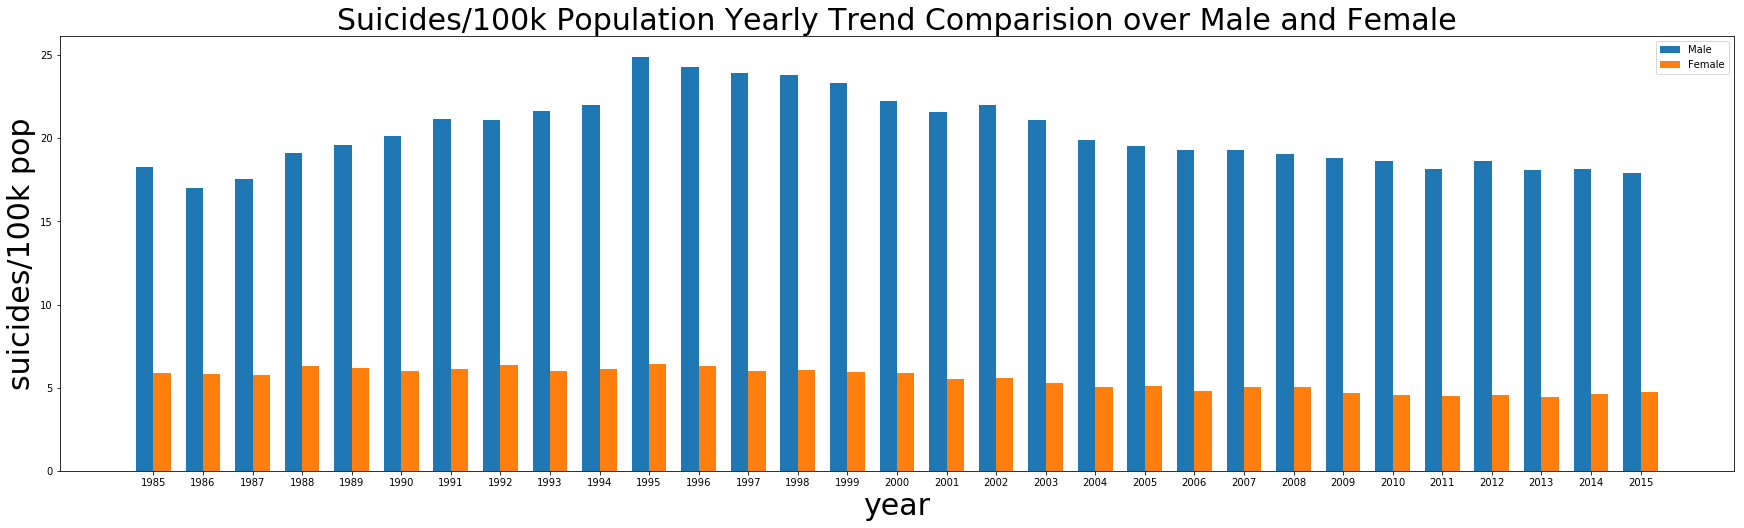

In [16]:
figure, axs = plt.subplots(figsize = (30,8))

ind = np.arange(len(male_year))  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = axs.bar(ind - width/2, male_year, width, label='Male')
rects2 = axs.bar(ind + width/2, female_year, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_xlabel('year', size=30)
axs.set_xticks(ind)
axs.set_xticklabels((year))
axs.set_ylabel('suicides/100k pop', size=30)
axs.legend()
axs.set_title('Suicides/100k Population Yearly Trend Comparision over Male and Female', size = 30)
plt.show()

From the above plot, we can see male suicides number is three times more than female  every year. Maybe man are under more pressure to support the family?

### 2.3 Suicide rate comparison over age 

In [17]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [18]:
age5_14_year = []
age15_24_year = []
age25_34_year = []
age35_54_year = []
age55_74_year = []
age75_year = []
for i in year:
    age5_14_year.append(df[(df.year==i)&(df.age=='5-14 years')]['suicides/100k pop'].mean())
    age15_24_year.append(df[(df.year==i)&(df.age=='15-24 years')]['suicides/100k pop'].mean())
    age25_34_year.append(df[(df.year==i)&(df.age=='25-34 years')]['suicides/100k pop'].mean())
    age35_54_year.append(df[(df.year==i)&(df.age=='35-54 years')]['suicides/100k pop'].mean())
    age55_74_year.append(df[(df.year==i)&(df.age=='55-74 years')]['suicides/100k pop'].mean())
    age75_year.append(df[(df.year==i)&(df.age=='75+ years')]['suicides/100k pop'].mean())


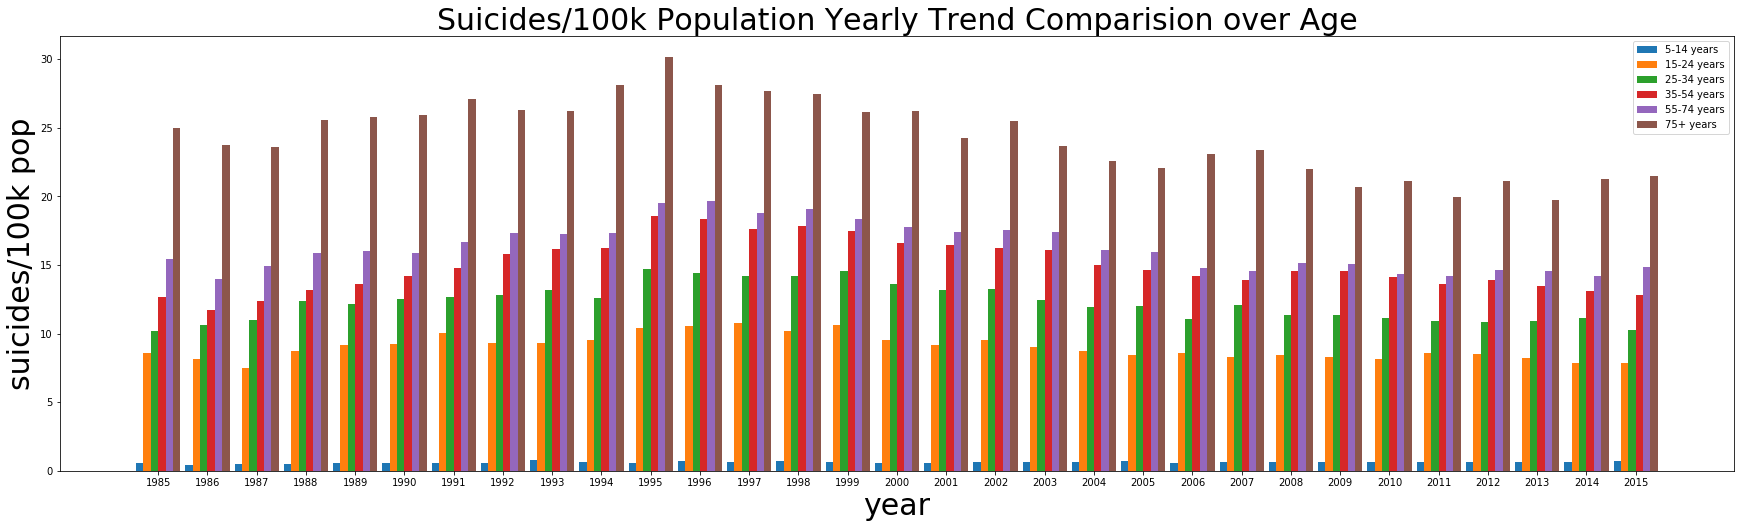

In [19]:
figure, axs = plt.subplots(figsize = (30,8))

ind = np.arange(len(age35_54_year))  # the x locations for the groups
width = 0.15  # the width of the bars
rects1 = axs.bar(ind - width*2.5, age5_14_year, width, label='5-14 years')
rects2 = axs.bar(ind - width*1.5, age15_24_year, width, label='15-24 years')
rects3 = axs.bar(ind - width*0.5, age25_34_year, width, label='25-34 years')
rects4 = axs.bar(ind + width*0.5, age35_54_year, width, label='35-54 years')
rects5 = axs.bar(ind + width*1.5, age55_74_year, width, label='55-74 years')
rects6 = axs.bar(ind + width*2.5, age75_year, width, label='75+ years')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_xlabel('year', size=30)
axs.set_xticks(ind)
axs.set_xticklabels((year))
axs.set_ylabel('suicides/100k pop', size=30)
axs.legend()
axs.set_title('Suicides/100k Population Yearly Trend Comparision over Age', size = 30)
plt.show()

Obviously, older people are more likely to commit suicide. The more we know, the more stressful we are, sigh. 

### 2.4 Suicide rate by country 

In [20]:
suicide_by_country = df.groupby(['country']).mean()
top10 = list(suicide_by_country['suicides/100k pop'].sort_values(ascending=False).head(10).index)
print('Top 10 highest suicide rate countries are:', top10)
bot10 = list(suicide_by_country['suicides/100k pop'].sort_values(ascending=True).head(10).index)
print('Top 10 highest suicide rate countries are:', bot10)

Top 10 highest suicide rate countries are: ['Lithuania', 'Sri Lanka', 'Russian Federation', 'Hungary', 'Belarus', 'Kazakhstan', 'Latvia', 'Slovenia', 'Estonia', 'Ukraine']
Top 10 highest suicide rate countries are: ['Jamaica', 'Antigua and Barbuda', 'South Africa', 'Kuwait', 'Bahamas', 'Maldives', 'Qatar', 'Bahrain', 'Azerbaijan', 'Grenada']


In [21]:
suicide_by_country.sample(5)

,year,suicides_no,population,suicides/100k pop,gdp,gdp_per_capita
country,,,,,,
Seychelles,2004.333333,0.453704,6.448222e+03,7.480093,8.564692e+08,10655.722222
Germany,2002.500000,933.532051,6.489986e+06,15.559904,2.742233e+12,35164.230769
Latvia,2005.000000,50.674603,1.779867e+05,29.259325,1.831660e+10,8961.095238
Ecuador,2000.000000,55.537634,9.256129e+05,6.304328,3.960132e+10,3286.258065
Saint Lucia,1999.750000,0.684524,1.163845e+04,7.202738,8.409455e+08,5789.035714


In [22]:
top_countries = pd.concat([suicide_by_country.loc[top10], suicide_by_country.loc[bot10]], axis=0)
top_countries

,year,suicides_no,population,suicides/100k pop,gdp,gdp_per_capita
country,,,,,,
Lithuania,2005.000000,108.003968,2.604758e+05,40.583968,2.711290e+10,9024.142857
Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,1.532645e+10,904.272727
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,8.843229e+11,6518.814815
Hungary,2003.000000,240.433333,8.008463e+05,33.049100,8.831404e+10,9234.120000
Belarus,2001.095238,237.666667,7.832234e+05,31.075913,3.067641e+10,3333.904762
Kazakhstan,2002.500000,325.467949,1.209980e+06,30.511282,7.868722e+10,5329.115385
Latvia,2005.000000,50.674603,1.779867e+05,29.259325,1.831660e+10,8961.095238
Slovenia,2005.000000,42.123016,1.597961e+05,27.827857,3.590006e+10,18642.238095
Estonia,2005.000000,27.912698,1.075032e+05,27.276905,1.444586e+10,11376.095238


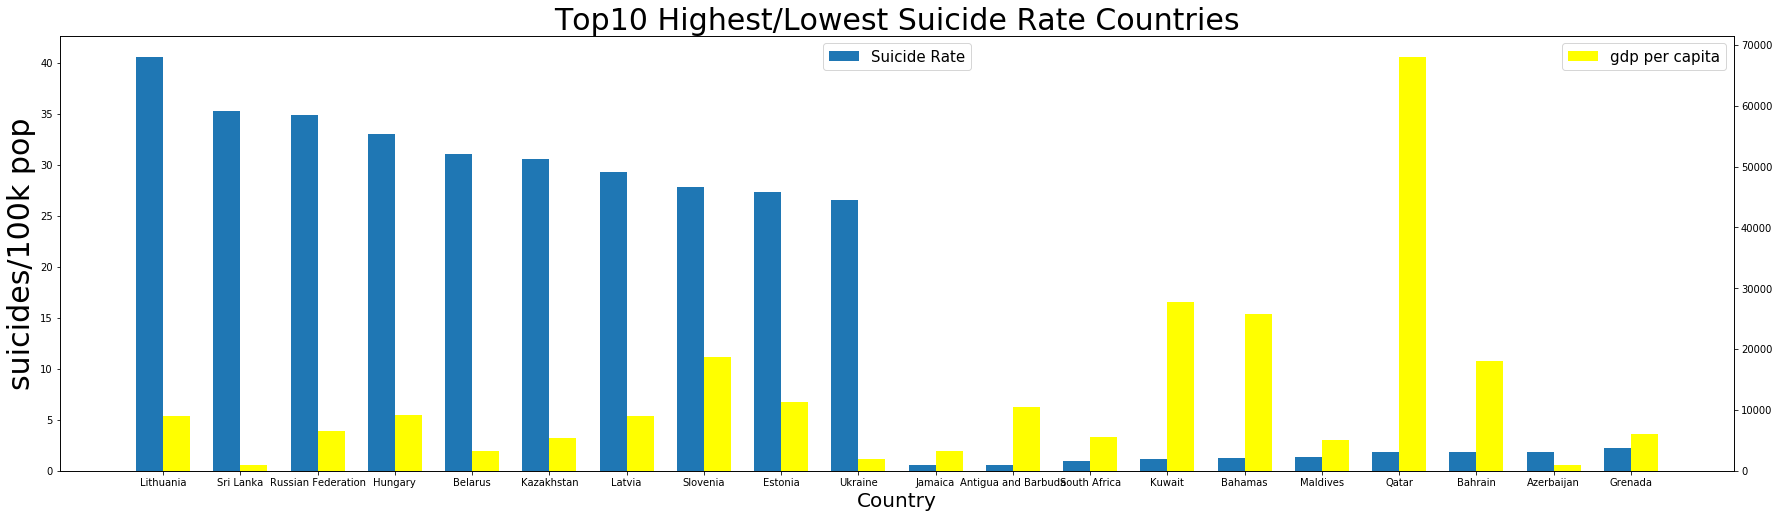

In [23]:
figure, axs = plt.subplots( figsize = (30,8))

# Top10 highest 
ind = np.arange(20)  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = axs.bar(ind - width/2, list(top_countries['suicides/100k pop']), width, label='Suicide Rate')
ax2 = axs.twinx()
rects2 = ax2.bar(ind + width/2, list(top_countries['gdp_per_capita']), width, label='gdp per capita', color='yellow')
# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_xlabel('Country', size=20)
axs.set_xticks(ind)
axs.set_xticklabels((top_countries.index), size=10)
axs.set_ylabel('suicides/100k pop', size=30)
axs.legend(loc='upper center', fontsize=15)
#ax2.set_ylabel('gpd per capita', size=30)
ax2.legend(loc='upper right',  fontsize=15)
axs.set_title('Top10 Highest/Lowest Suicide Rate Countries', size = 30)
plt.show()

From the above plot, we see no direct relation between suicide rate and gdp. The top 10 highest suicide rate countries are mostly from Soviet bloc nation  While the top 10 lowest suicide rate countries are mostly island counties, with beautiful beaches and pleasant weather, who would like to die. 

### 2.5 Compare suicide rate between developed and developping countries

In [24]:
# check suicide rate and gdp of a given country
def check_yearly(country):
    '''
    Input: country name
    return: suicide rate and gpd for year 1982-2015 for the input country
    '''
    df_country = df[df['country']== country].groupby(['year']).sum()
    suicide_rate = list(df_country['suicides_no']/df_country['population']*1e5)
    gdp = df[df['country']== country]['gdp_per_capita'].unique()
    
    return suicide_rate, gdp

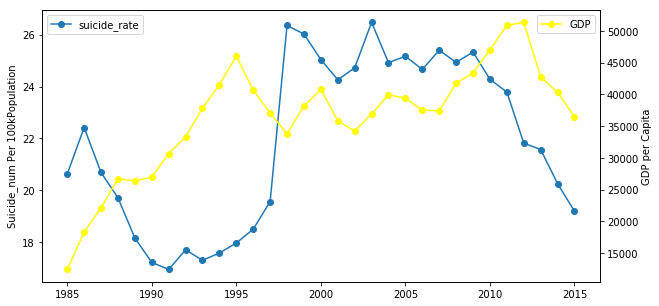

In [25]:
japan_rate, japan_gdp = check_yearly('Japan')
figure, axs = plt.subplots(figsize = (10,5))
axs.plot(year, japan_rate, label='suicide_rate', marker='o')
axs.legend(loc='upper left')
axs.set_ylabel('Suicide_num Per 100kPopulation')
axs2 = axs.twinx()
axs2.plot(year, japan_gdp, label='GDP', marker='o', color='yellow')
axs2.set_ylabel('GDP per Capita')
axs2.legend(loc='upper right')
plt.show()

In [26]:
usa_rate, usa_gdp = check_yearly('United States')
mexico_rate, mexico_gdp = check_yearly('Mexico')

NameError: name 'usa_gpd' is not defined

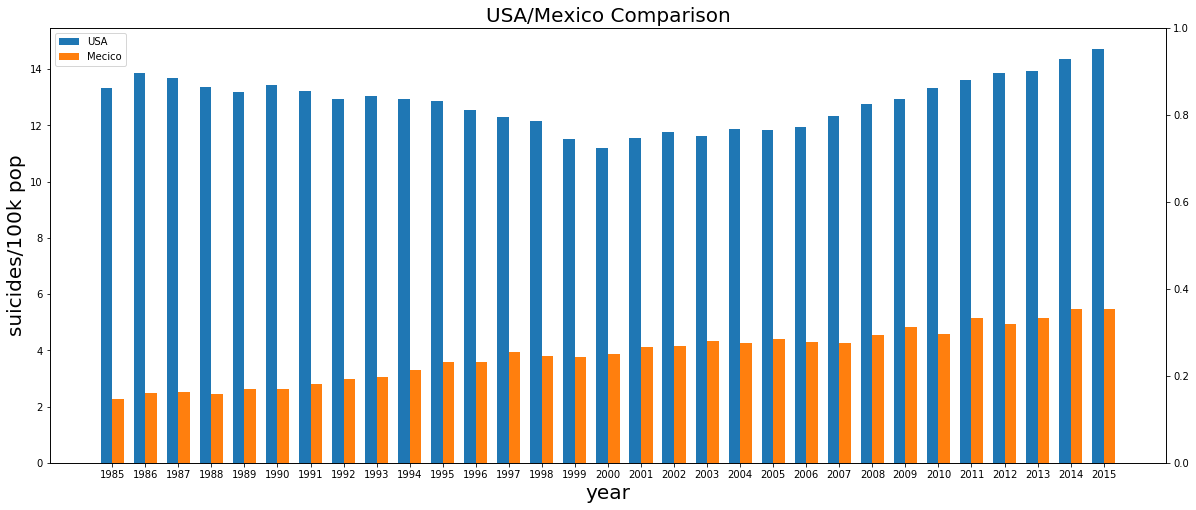

In [27]:
figure, axs = plt.subplots(figsize = (20,8))

ind = np.arange(len(year))  # the x locations for the groups
width = 0.35  # the width of the bars
axs.bar(ind - width/2, usa_rate, width, label='USA')
axs.bar(ind + width/2, mexico_rate, width, label='Mecico')
axs.set_xlabel('year', size=20)
axs.set_xticks(ind)
axs.set_xticklabels((year))
axs.set_ylabel('suicides/100k pop', size=20)
axs.legend(loc='upper left')
axs.set_title('USA/Mexico Comparison', size = 20)

axs2 = axs.twinx()
axs2.plot(ind - width/2, usa_gpd, width, label='USA', marker='o', color='green', linestyle='dashed')
axs2.plot(ind + width/2, mexico_gpd, width, label='Mecico gdp-pc', color='yellow', marker='o', linestyle='dashed')
axs2.legend(loc='upper right')
axs2.set_ylabel('gdp per capita', size=20)

plt.show()

Compare USA and its southern neighbor Mexico, although Mexico is less developed than USA, the suicide rate is much less. 

# 3. Conclusion

Suicide rate is investigated based on selected countries during 1985 to 2015, several interesting findings are derived:
1. Although gpd is growing year over year, and people are getting richer, the suicide rate doesn't decrease dramatically, it peaks at year 1995, then gradually decreases, the year 1988 shows lowest suicide rate. 
2. Male has three times higher suicide rate than female.
3. Older people higher larger suicide rate, especially over 75 years old. 
4. Countries in Soviet bloc nation show high suicide rate, while island countries have low suicide rate.
5. Although USA is much richer than its southern neighbor Mexico, the suicide rate is over three times higher. 